In [44]:
from baselines.common import plot_util as pu
import matplotlib.pyplot as plt
import numpy as np
import sys
import csv

In [4]:

rom matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

SyntaxError: invalid syntax (<ipython-input-4-f4e6364aeb61>, line 2)

In [2]:
v = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.5, 2]

## Cheetah

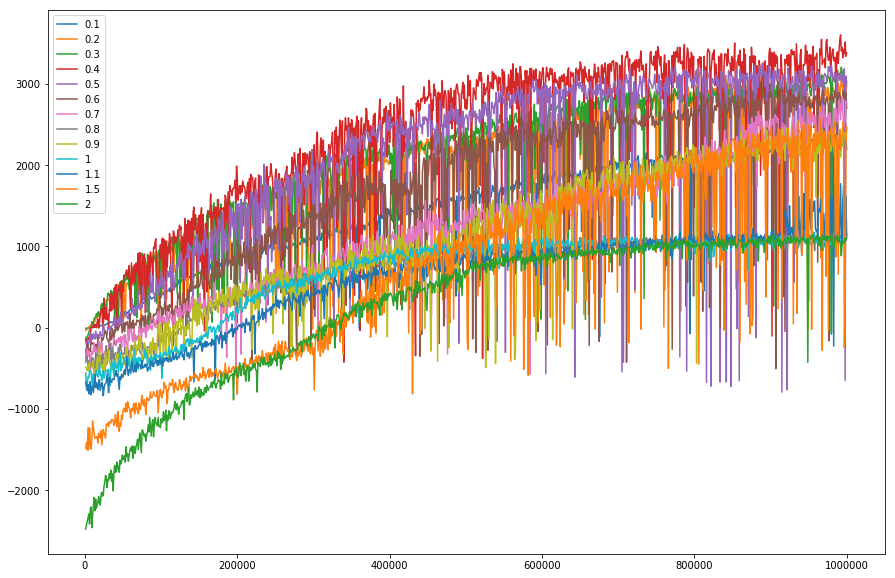

In [8]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/Cheetah'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), r_orig.monitor.r, label=str(var))
plt.legend()


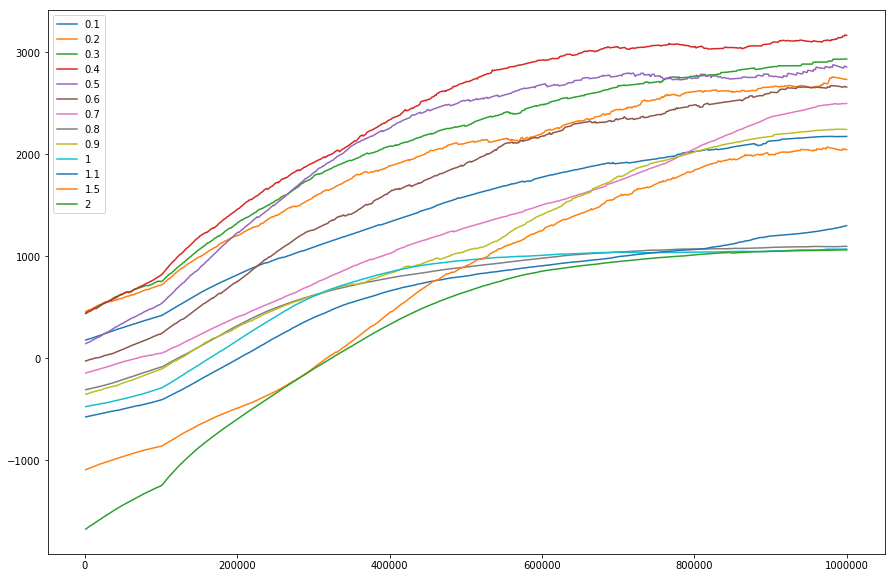

In [14]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/Cheetah'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), pu.smooth(r_orig.monitor.r, radius=100), label=str(var))
plt.legend()

## Hopper

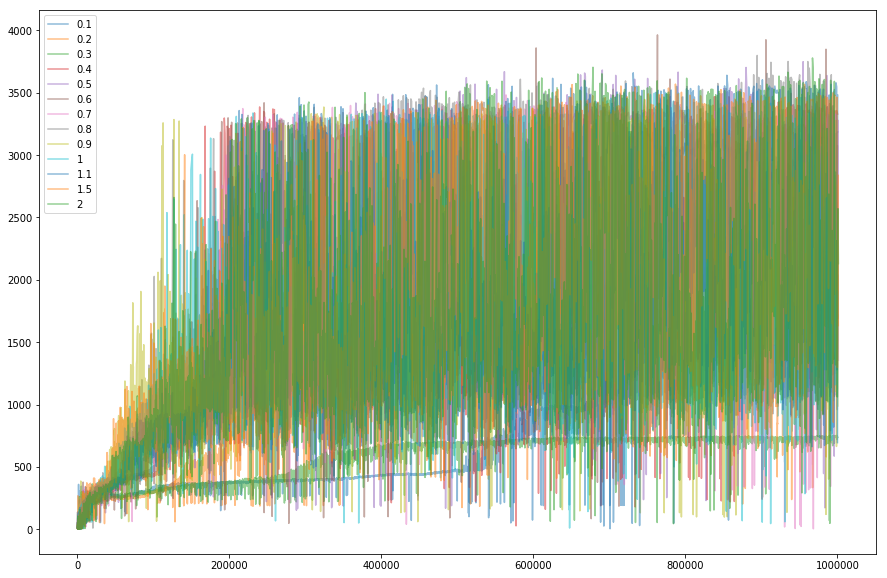

In [16]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/hopper'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), r_orig.monitor.r, alpha=.5, label=str(var))
plt.legend()

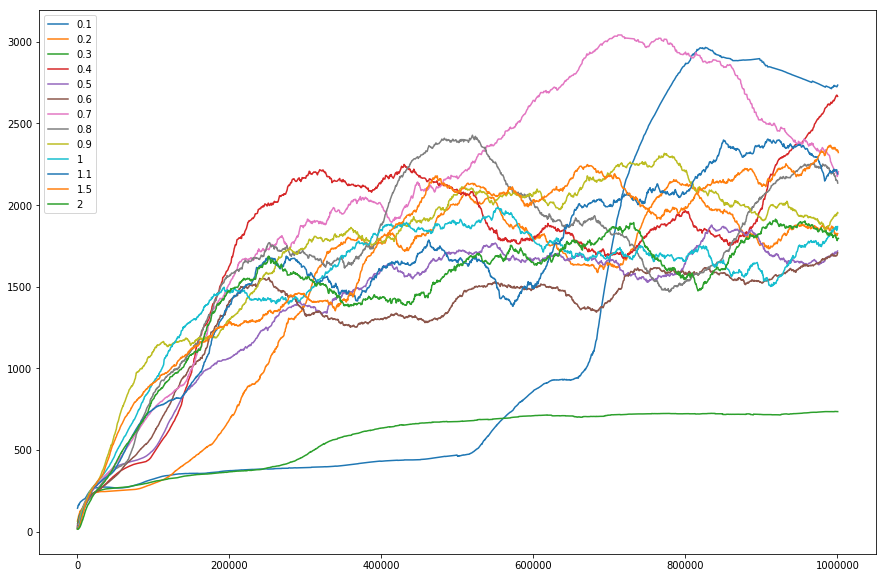

In [13]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/hopper'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), pu.smooth(r_orig.monitor.r, radius=100),label=str(var))
plt.legend()

### Varied variances vs. learning curves

### Hopper

In [73]:
def get_plottable(res_dir):

    r_orig = pu.load_results(res_dir)[0]

    progress = csv.reader(open(res_dir+"/progress.csv"))
    next(progress, None) #skip first line
    std_x = [int(v[5]) for v in progress] 

    std = [[float(x) for x in line.strip()[1:-1].split()] for line in open(res_dir+"/std.txt")]
    std_norm = [np.linalg.norm(v) for v in std]
    
    if len(std_x) != len(std_norm):
        print("len of x std_x is: %d" % len(std_x))
        print("len of x std_norm is: %d" % len(std_norm))
        std_norm = std_norm[:len(std_x)]
    
    return np.cumsum(r_orig.monitor.l), r_orig.monitor.r, std_x, std_norm 


In [66]:
rew_1_x, rew_1, std_1_x, std_1 = get_plottable('logs/hopper_init_1') 
rew_e_x, rew_e, std_e_x, std_e =  get_plottable('logs/hopper_init_e') 

/home/ss/dev/baselines_explorations/baselines/baselines/bench/monitor.py:163: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


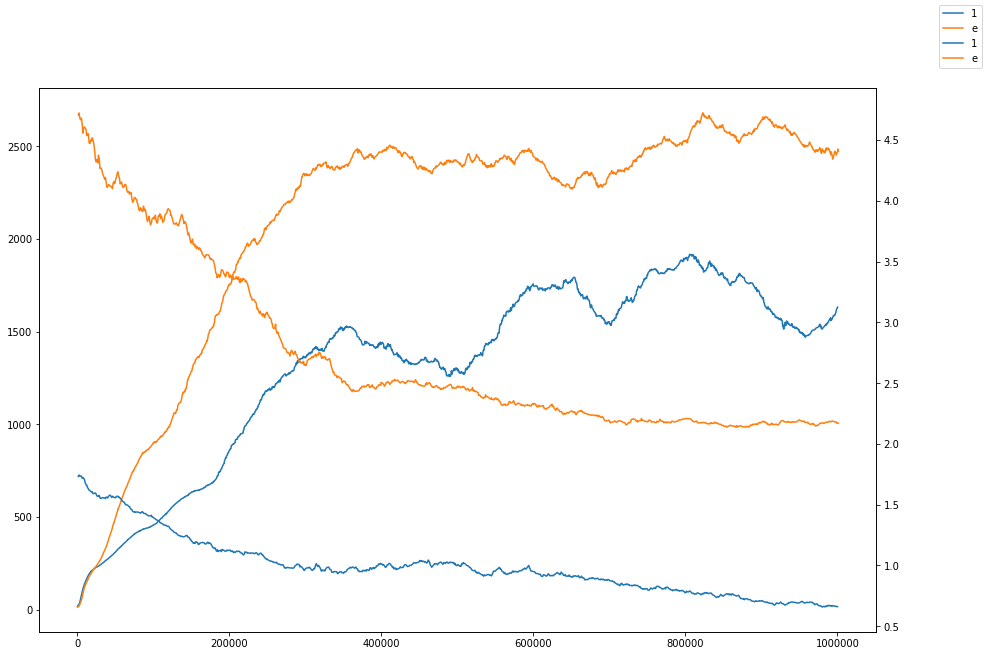

In [67]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 10)
ax1.plot(rew_1_x, pu.smooth(rew_1, radius=100),label="1")
ax1.plot(rew_e_x, pu.smooth(rew_e, radius=100),label="e")

ax2 = ax1.twinx()
ax2.plot(std_1_x, std_1, label="1")
ax2.plot(std_e_x, std_e, label="e")
fig.legend()

### Cheetah

In [74]:
rew_1_x, rew_1, std_1_x, std_1 = get_plottable('logs/cheetah_init_1') 
rew_e_x, rew_e, std_e_x, std_e = get_plottable('logs/cheetah_init_e') 

len of x std_x is: 977
len of x std_norm is: 978


/home/ss/dev/baselines_explorations/baselines/baselines/bench/monitor.py:163: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


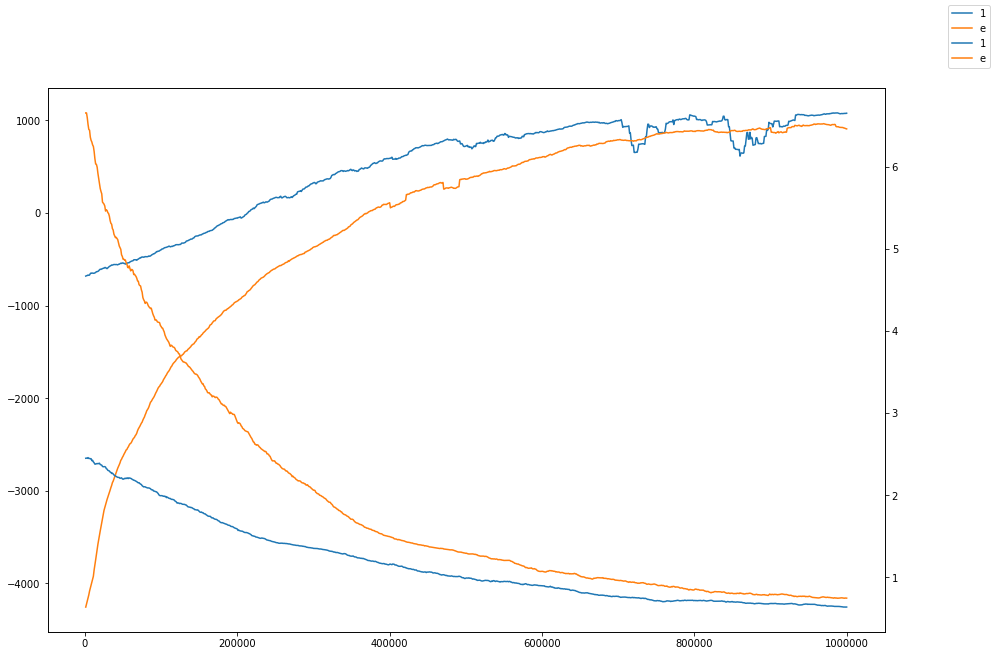

In [75]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 10)
ax1.plot(rew_1_x, pu.smooth(rew_1, radius=10),label="1")
ax1.plot(rew_e_x, pu.smooth(rew_e, radius=10),label="e")

ax2 = ax1.twinx()
ax2.plot(std_1_x, std_1, label="1")
ax2.plot(std_e_x, std_e, label="e")
fig.legend()

## state-dependent variances

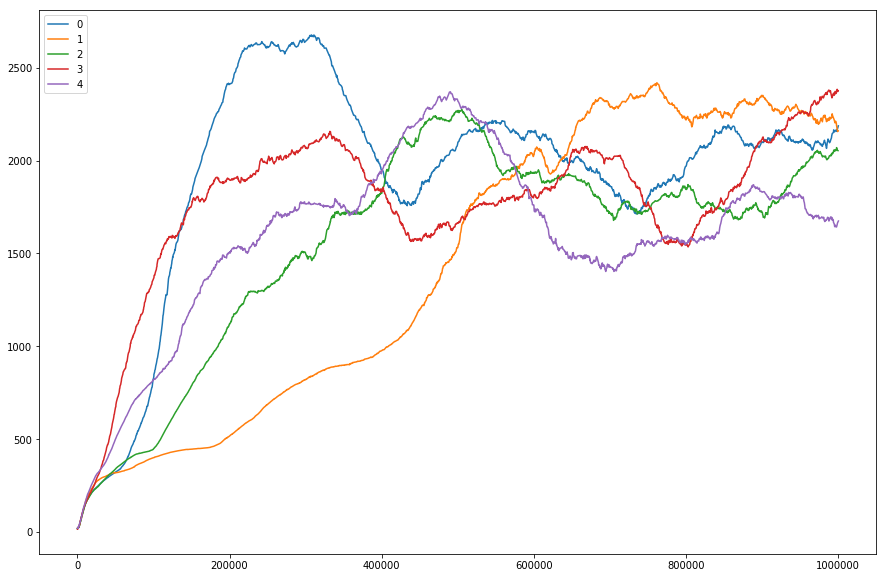

In [76]:
plt.figure(figsize=(15,10))
for i in range(5):
    rew_x, rew, std_x, std =  get_plottable('var_logs/hopper_'+str(i))
    plt.plot(rew_x, pu.smooth(rew, radius=100), label=str(i))
plt.legend()

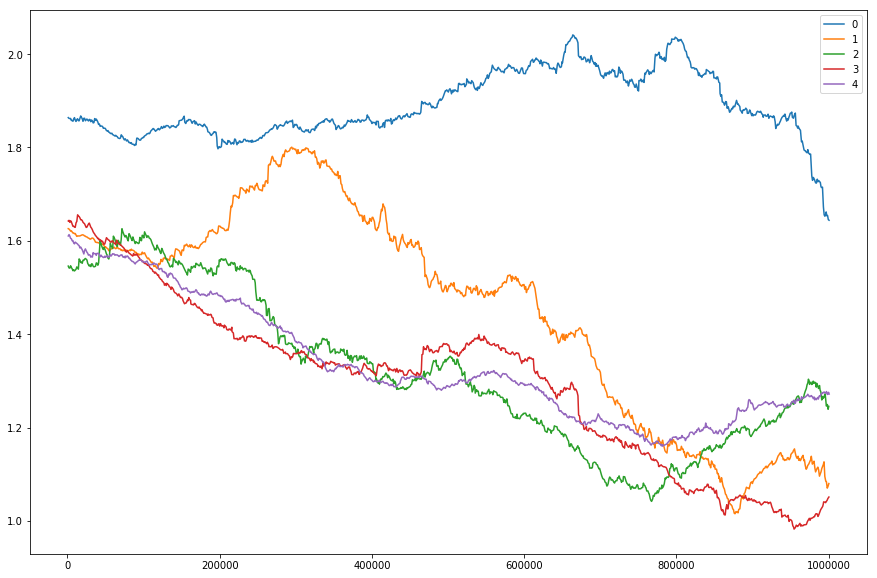

In [81]:
plt.figure(figsize=(15,10))
for i in range(5):
    rew_x, rew, std_x, std =  get_plottable('var_logs/hopper_'+str(i))
    plt.plot(std_x,  pu.smooth(std, radius=100), label=str(i))
plt.legend()

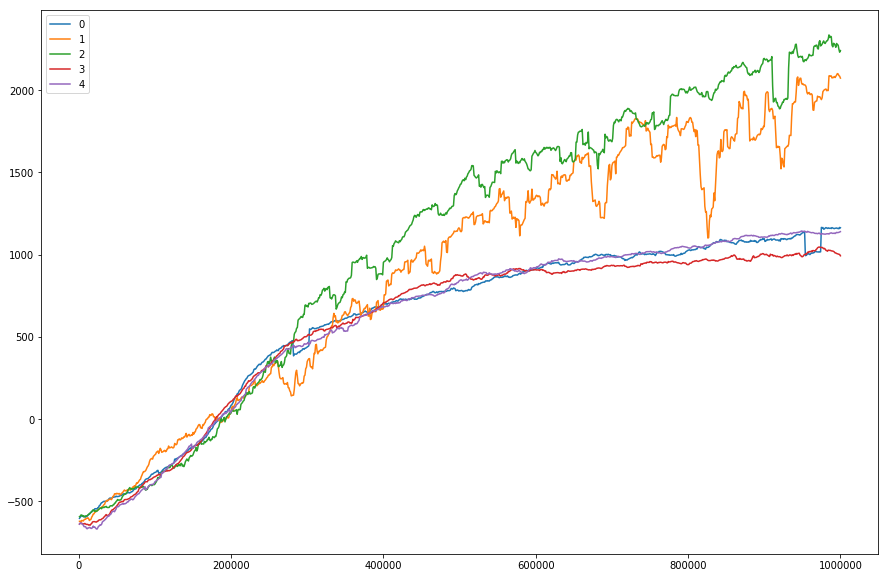

In [84]:
plt.figure(figsize=(15,10))
for i in range(5):
    rew_x, rew, std_x, std =  get_plottable('var_logs/cheetah_'+str(i))
    plt.plot(rew_x, pu.smooth(rew, radius=10), label=str(i))
plt.legend()

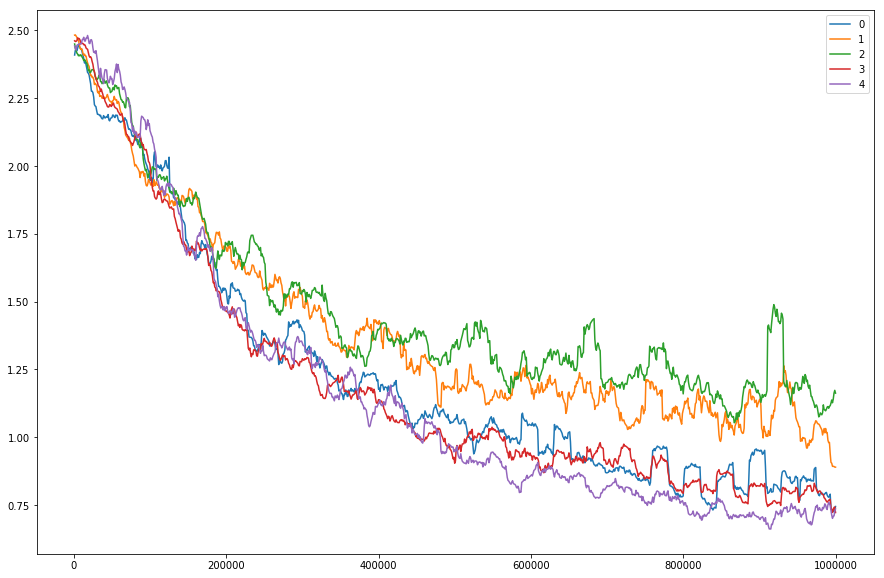

In [83]:
plt.figure(figsize=(15,10))
for i in range(5):
    rew_x, rew, std_x, std =  get_plottable('var_logs/cheetah_'+str(i))
    plt.plot(std_x,  pu.smooth(std, radius=10), label=str(i))
plt.legend()

### If we look specifically at trial2

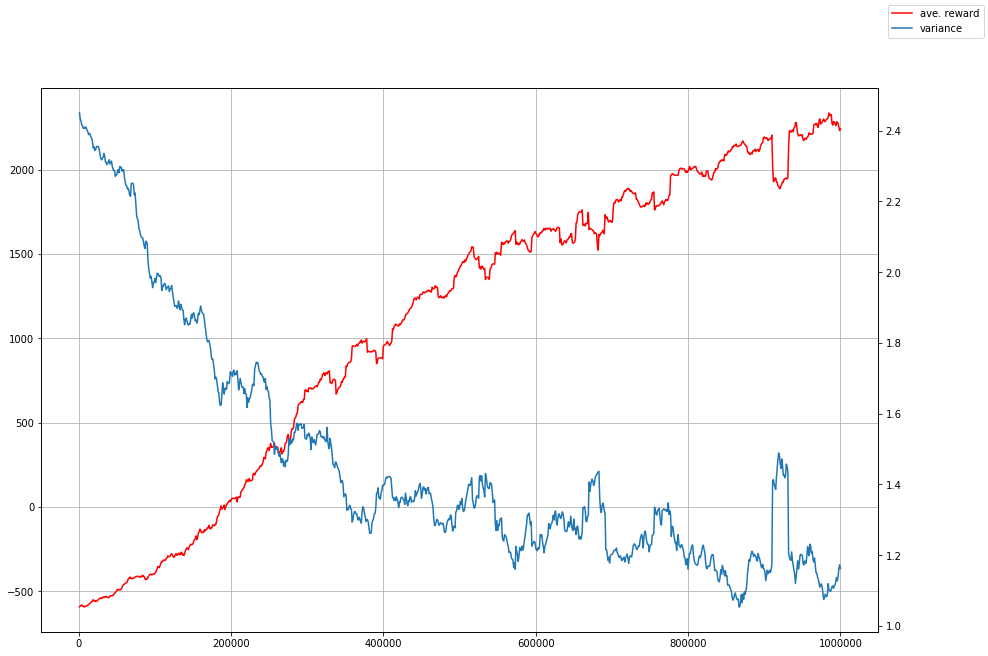

In [89]:
rew_x, rew, std_x, std =  get_plottable('var_logs/cheetah_2')

fig, ax1 = plt.subplots()
fig.set_size_inches(15, 10)
ax1.plot(rew_x, pu.smooth(rew, radius=10), label="ave. reward", color='red')

ax2 = ax1.twinx()
ax2.plot(std_x, pu.smooth(std,radius=10), label="variance")
ax1.grid()
fig.legend()